# Nama : Fakhri Raihan Alhafiz
# NIM : 09011281924030
# Kelas : SK5A

sumber : https://www.kaggle.com/prathamtripathi/drug-classification/tasks
         dan https://www.kaggle.com/krishnabhatt4/drug-classification-eda

# Klasifikasi Narkoba Menggunakan ANN
### Part 1 - Data Processing
    - Import libraries
    - Import Set Data
    - Informasi Set Data(Pandas Profiling)
    - Pembagian training dan testing dataset
    - Mengukur fitur menggunakan skala
### Part 2 - Membuat ANN
    - Inisialisasi ANN
    - Penambahan layer input dan hidden layer pertama
    - Penambahan hidden layer kedua
    - Penambahan layer output
### Part 3 - Melatih/Training ANN
    - Compile ANN
    - Traning ANN di Training set
### Part 4 - Membuat prediksi dan evaluasi model
    - Memprediksi hasil dari test set
    - Membuat Confusion Matrix

## Part 1 - Data Processing

### Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Import Dataset

In [10]:
data = pd.read_csv('drug200.csv')

In [11]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


- **Age** : Usia Pasien
- **Sex** : Jenis Kelamin dari pasien
- **BP** : Tekanan Darah dari pasien
- **Cholesterol** : Kolesterol dari pasien
- **Na_to_K** : Rasio Sodium ke Potassium di dalam darah pasien
- **Drug** : Tipe Narkoba dari pasien

### Informasi dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [17]:
data.shape

(200, 6)

In [15]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

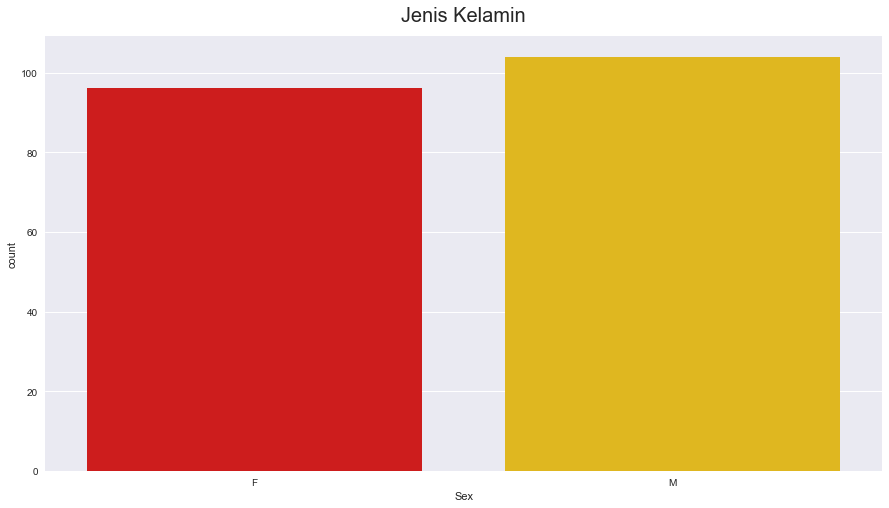

In [28]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Jenis Kelamin", fontsize=20, y=1.02)
sns.countplot(x = data.Sex, palette="hot")
plt.show()

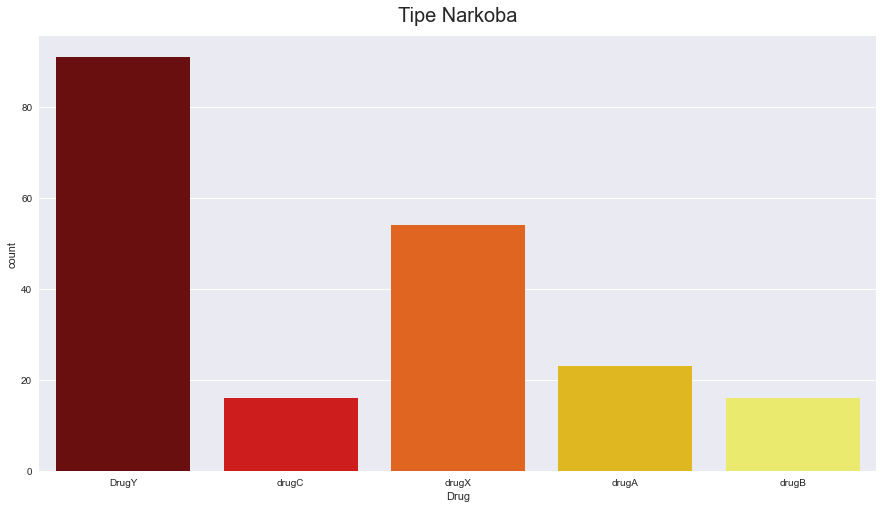

In [27]:
plt.figure(figsize=(15,8))
plt.title("Tipe Narkoba", fontsize=20, y=1.02)
sns.countplot(x = data.Drug, palette="hot")
plt.show()

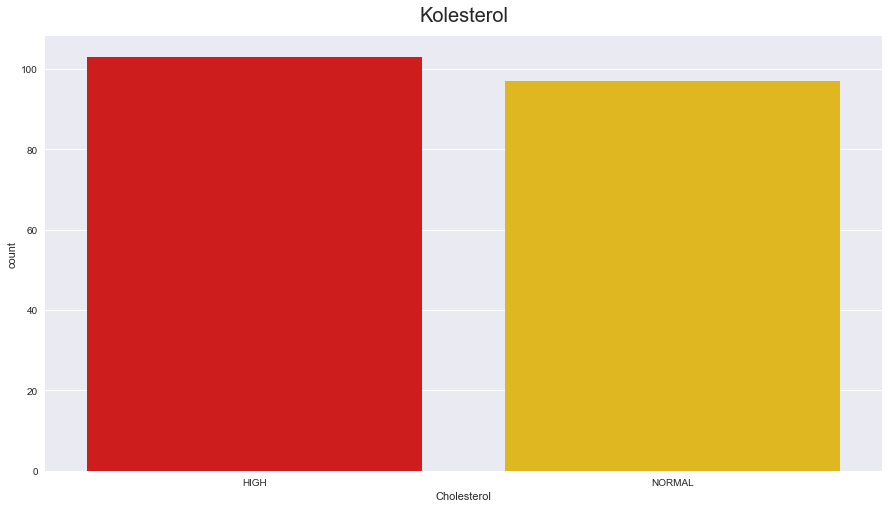

In [26]:
plt.figure(figsize=(15,8))
plt.title("Kolesterol", fontsize=20, y=1.02)
sns.countplot(x = data.Cholesterol, palette="hot")
plt.show()

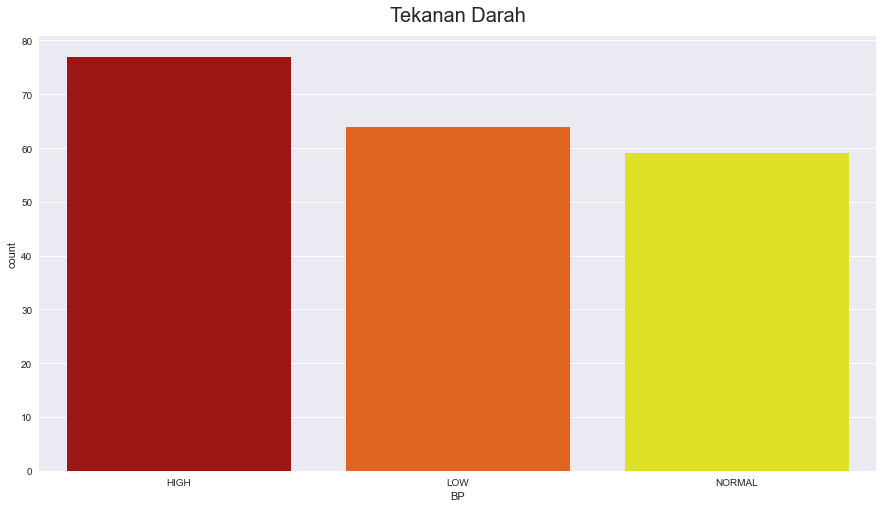

In [25]:
plt.figure(figsize=(15,8))
plt.title("Tekanan Darah", fontsize=20, y=1.02)
sns.countplot(x = data.BP, palette="hot")
plt.show()

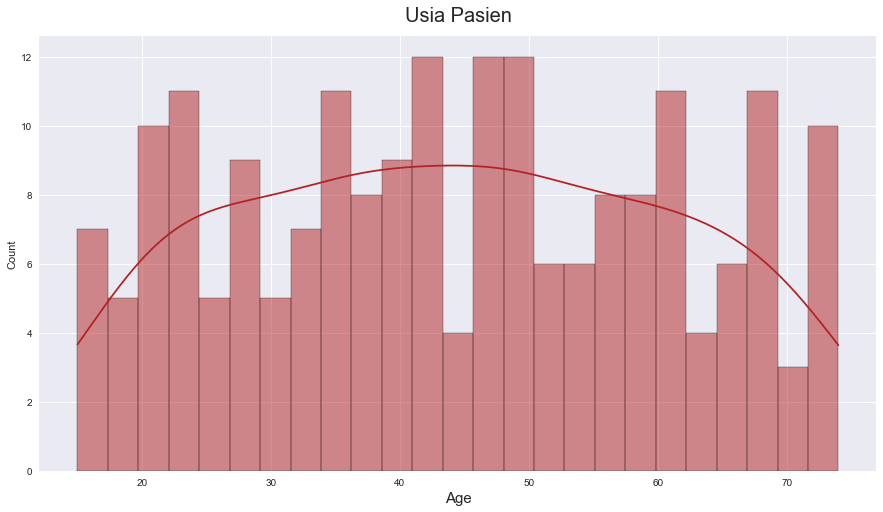

In [24]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data["Age"], kde=True, bins=25, color="firebrick")
plt.title("Usia Pasien", fontsize=20, y=1.02)
ax.set_xlabel("Age",fontsize=15);

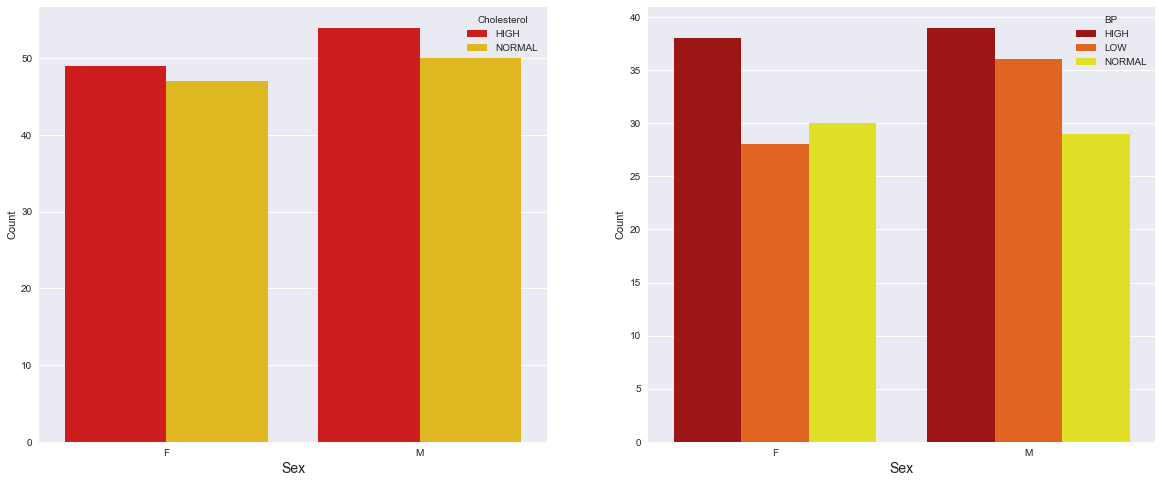

In [29]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,2, figsize=(20,8)) 

sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = data.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count"), palette="hot",ax=ax[0])
ax[0].set_xlabel("Sex",fontsize=14);

sns.barplot(x = "Sex", y = "Count", hue = "BP", data = data.groupby(["Sex", "BP"]).size().reset_index(name = "Count"), palette="hot", ax=ax[1]);
ax[1].set_xlabel("Sex",fontsize=14);

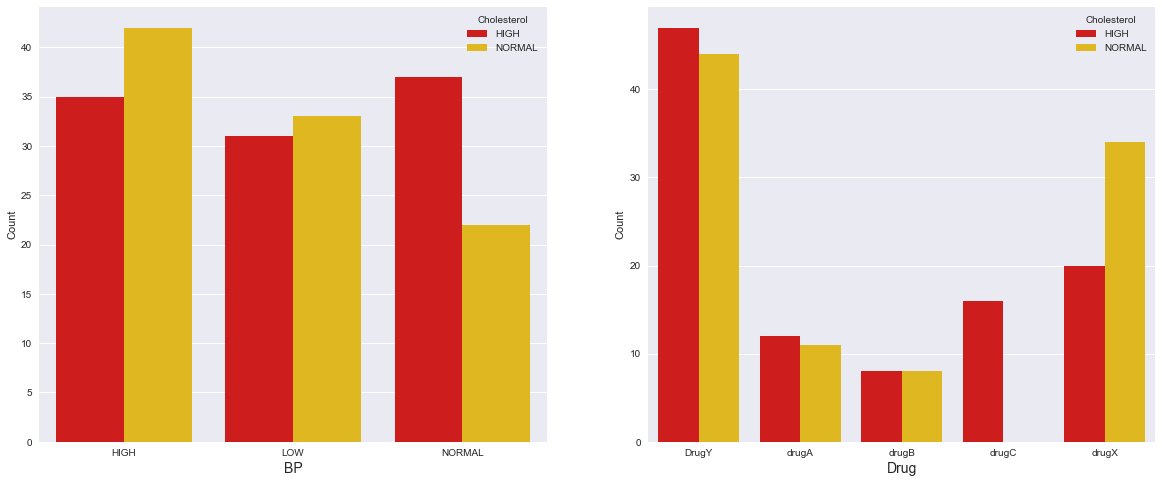

In [30]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,2, figsize=(20,8)) 

sns.barplot(x = "BP", y = "Count", hue = "Cholesterol", data = data.groupby(["BP", "Cholesterol"]).size().reset_index(name = "Count"), palette="hot", ax=ax[0])
ax[0].set_xlabel("BP",fontsize=14);

sns.barplot(x = "Drug", y = "Count", hue = "Cholesterol", data = data.groupby(["Drug", "Cholesterol"]).size().reset_index(name = "Count"), palette="hot", ax=ax[1]);
ax[1].set_xlabel("Drug",fontsize=14);

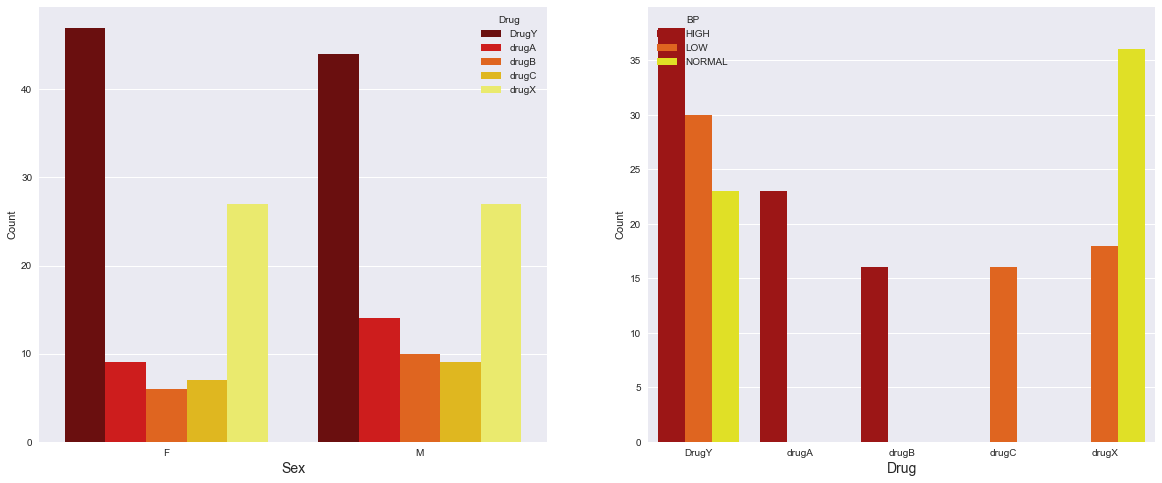

In [31]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,2, figsize=(20,8)) 

sns.barplot(x = "Sex", y = "Count", hue = "Drug", data = data.groupby(["Sex", "Drug"]).size().reset_index(name = "Count"), palette="hot", ax=ax[0])
ax[0].set_xlabel("Sex",fontsize=14);

sns.barplot(x = "Drug", y = "Count", hue = "BP", data = data.groupby(["Drug", "BP"]).size().reset_index(name = "Count"), palette="hot", ax=ax[1]);
ax[1].set_xlabel("Drug",fontsize=14);

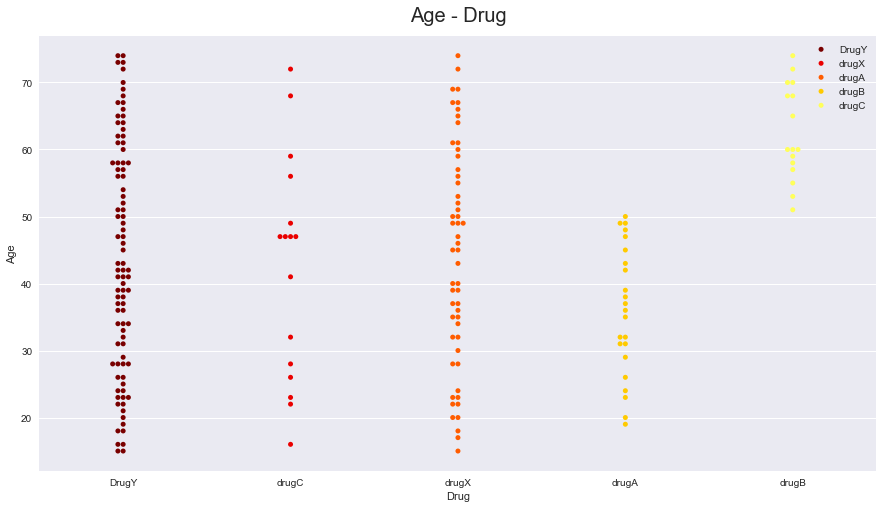

In [34]:
plt.figure(figsize = (15,8))
sns.swarmplot(x = "Drug", y = "Age", data = data, palette="hot")
plt.legend(data.Drug.value_counts().index)
plt.title("Age - Drug", fontsize=20, y=1.02)
plt.show()

In [35]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [36]:
# Konversi nilai non-numerik menjadi nilai numerik

data['Sex'] = data['Sex'].map({'M': 1, 'F': 2})
data['BP'] = data['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
data["Drug"] = data["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})

In [37]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


## Pembagian training dan testing dataset

Di sini, saya mencoba memprediksi jenis Obat yang akan diresepkan untuk pasien menggunakan data yang diberikan. Oleh karena itu, "Jenis Obat" akan menjadi label y dan data lainnya akan menjadi X atau data input

In [38]:
# X data
X = data.drop("Drug", axis=1)
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,2,1,1,25.355
1,47,1,3,1,13.093
2,47,1,3,1,10.114
3,28,2,2,1,7.798
4,61,2,3,1,18.043


In [39]:
# y data
y = data["Drug"]
y.head()

0    1
1    2
2    2
3    3
4    1
Name: Drug, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
len(X_train), len(X_test)

(160, 40)

## Mengukur fitur menggunakan skala

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)